## Hipótesis y correlación - Material de estudios

In [6]:
# importamos la triada de Data Science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# importamos scipy.stats que ayudará a generar distribuciones
import scipy.stats as stats
# importamos seaborn, siguiendo la convención de renombrarlo como sns
import seaborn as sns
# archivo con funciones de visualización
import lec4_graphs as gfx
# evitar warnings y deprecaciones
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use('seaborn') # gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (6,4) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 200 # resolución gráficos

In [11]:
# importamos la base de datos
df = pd.read_csv('qog_std_cs_jan18.csv')
df['ccode'].corr(df['undp_hdi'])

-0.03492616866410533

(array([ 2.,  3.,  8.,  4., 11., 10.,  7.,  8.,  5.,  9.,  4., 14., 14.,
        17., 19.,  8., 13.,  6., 13., 11.]),
 array([0.347     , 0.37705   , 0.4071    , 0.43715   , 0.4672    ,
        0.49725   , 0.5273    , 0.55735   , 0.5874    , 0.61745   ,
        0.6475    , 0.67755001, 0.70760001, 0.73765001, 0.76770001,
        0.79775001, 0.82780001, 0.85785001, 0.88790001, 0.91795001,
        0.94800001]),
 <BarContainer object of 20 artists>)

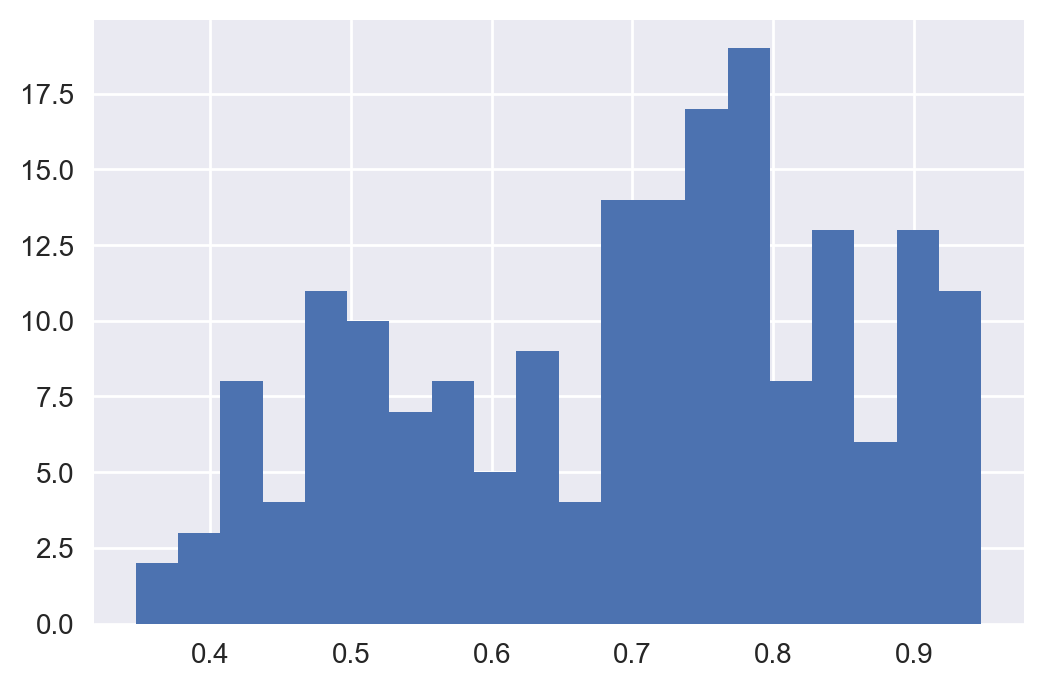

In [10]:
plt.hist(df['undp_hdi'].dropna(), 20)

Text(0.5, 1.0, 'Distribución del Indice de Desarrollo Humano')

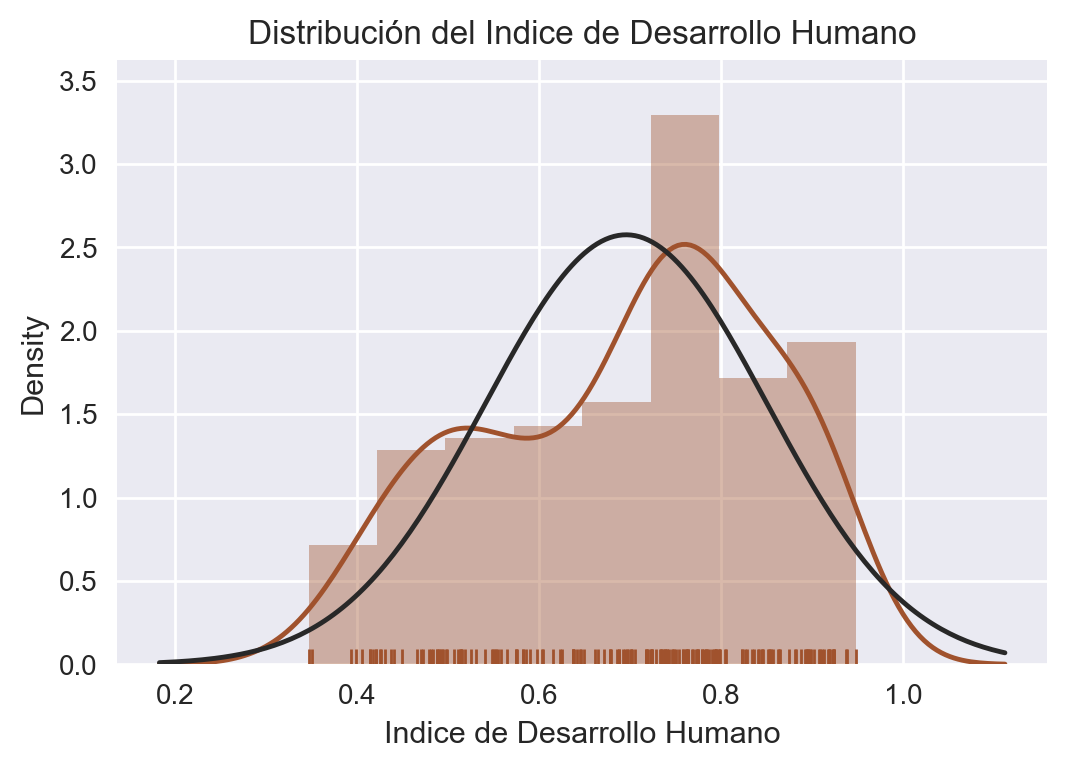

In [12]:
sns.distplot(df['undp_hdi'].dropna(), rug=True, axlabel="Indice de Desarrollo Humano", fit=stats.norm, color='sienna').set_title('Distribución del Indice de Desarrollo Humano')

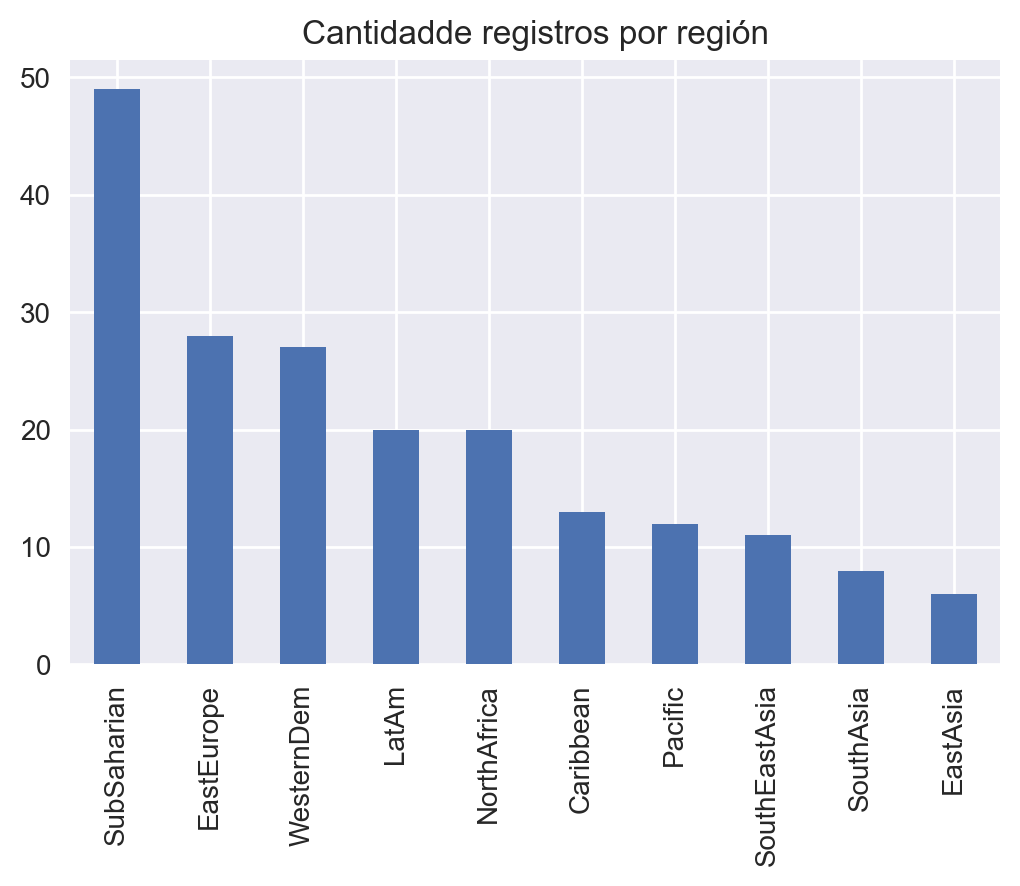

In [13]:
# generemos una variable para agregar los nombres asociados a cadanúmero
df['region_recod'] = df['ht_region'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9,10],
['EastEurope', 'LatAm', 'NorthAfrica',
'SubSaharian', 'WesternDem',
'EastAsia',
'SouthEastAsia','SouthAsia','Pacific', 'Caribbean' ])
# gráficamos en barras el resultado de value_counts.
df['region_recod'].value_counts().plot(kind='bar').set_title('Cantidad de registros por región');

Text(0.5, 1.0, 'Cantidad deregistros por región')

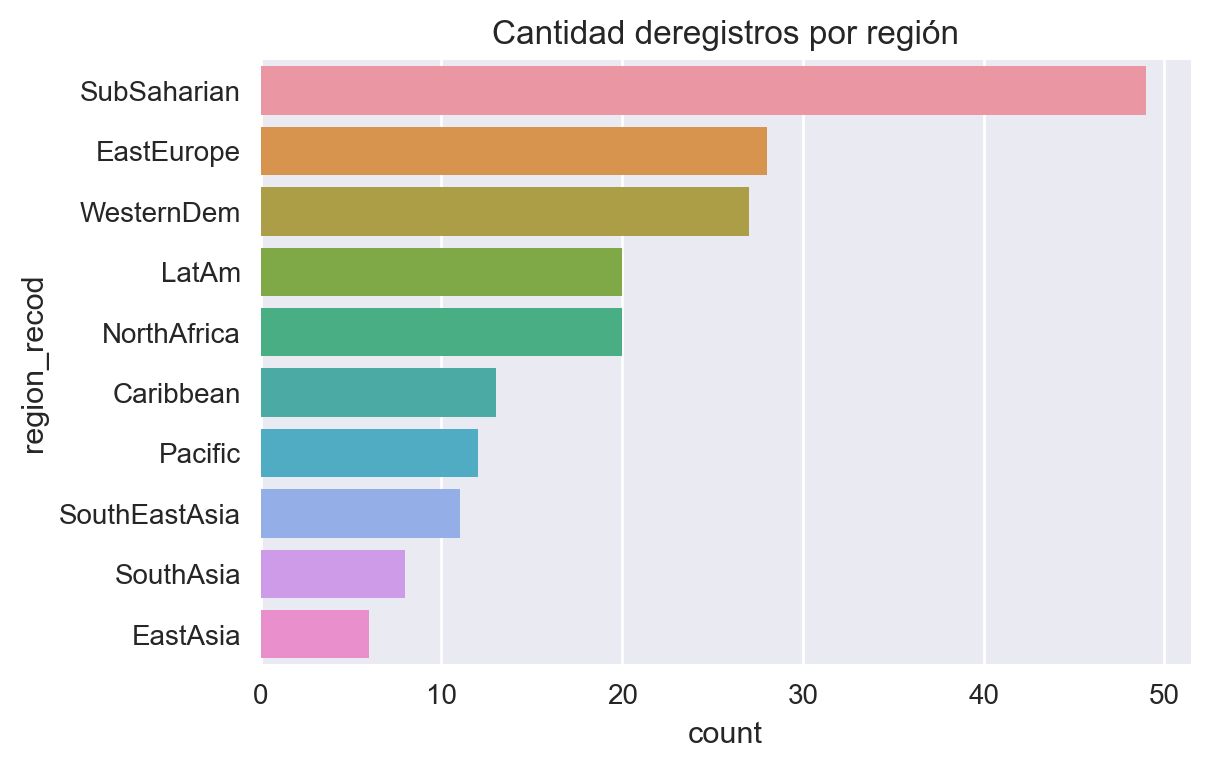

In [16]:
sns.countplot(y= df['region_recod'], order = df['region_recod'].value_counts().index).set_title('Cantidad deregistros por región')

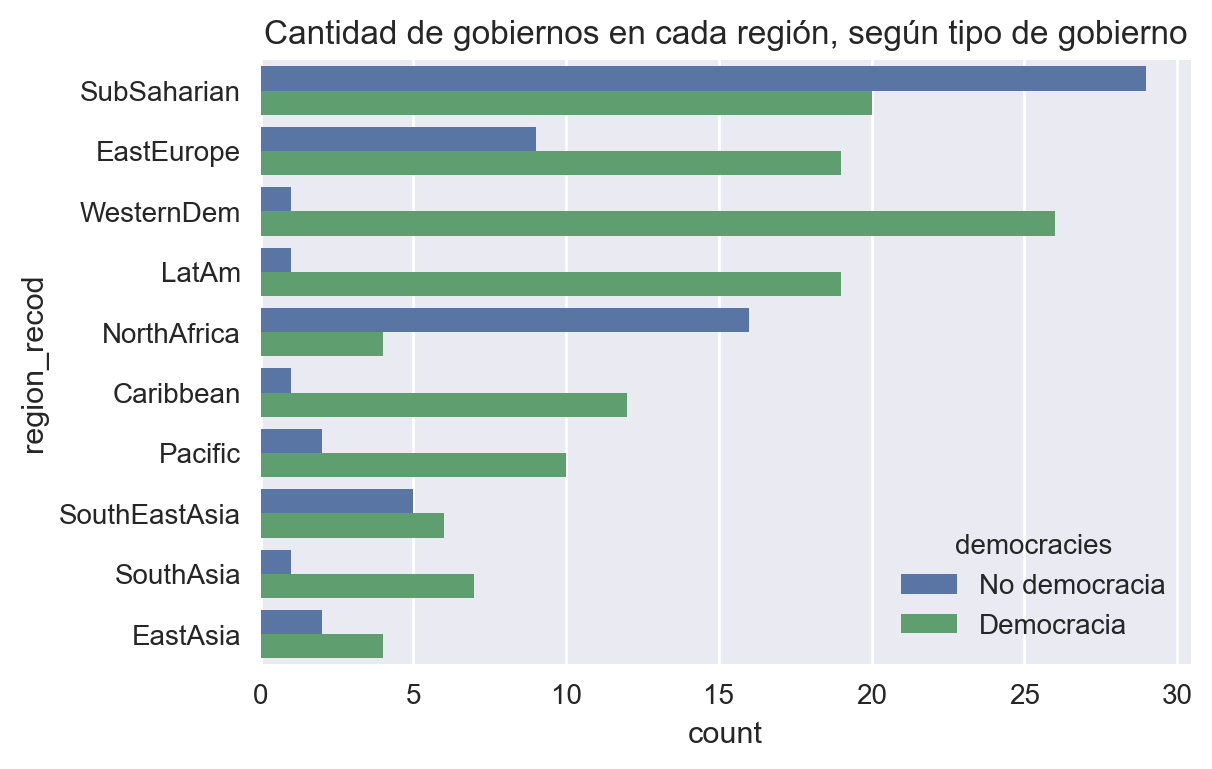

In [17]:
# generamos una recodificación binaria con np.where
df['democracies'] = np.where(df['gol_inst'] <= 2, 'Democracia', 'No democracia')
sns.countplot(y = df['region_recod'], hue=df['democracies'], order = df['region_recod'].value_counts().index).set_title('Cantidad de gobiernos en cada región, según tipo de gobierno');

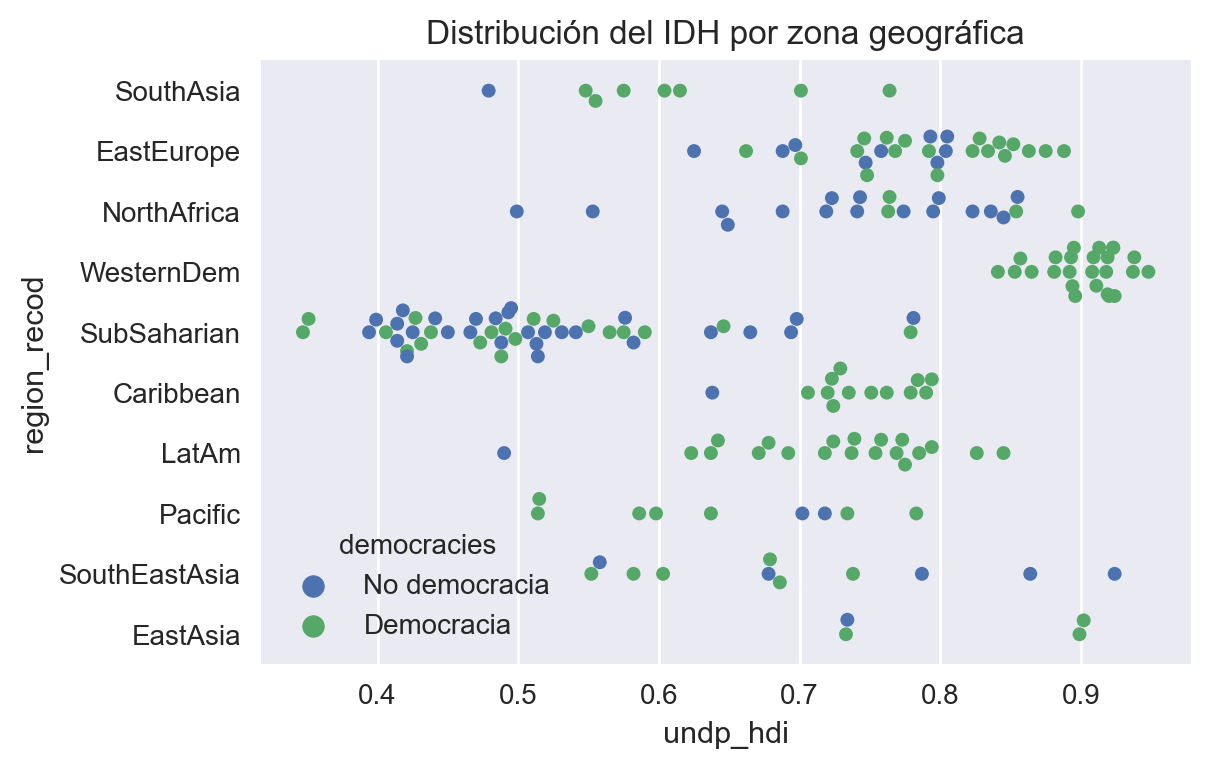

In [19]:
sns.swarmplot(y=df['region_recod'],
x=df['undp_hdi'], hue =
df['democracies']).set_title('Distribución del IDH por zona geográfica');

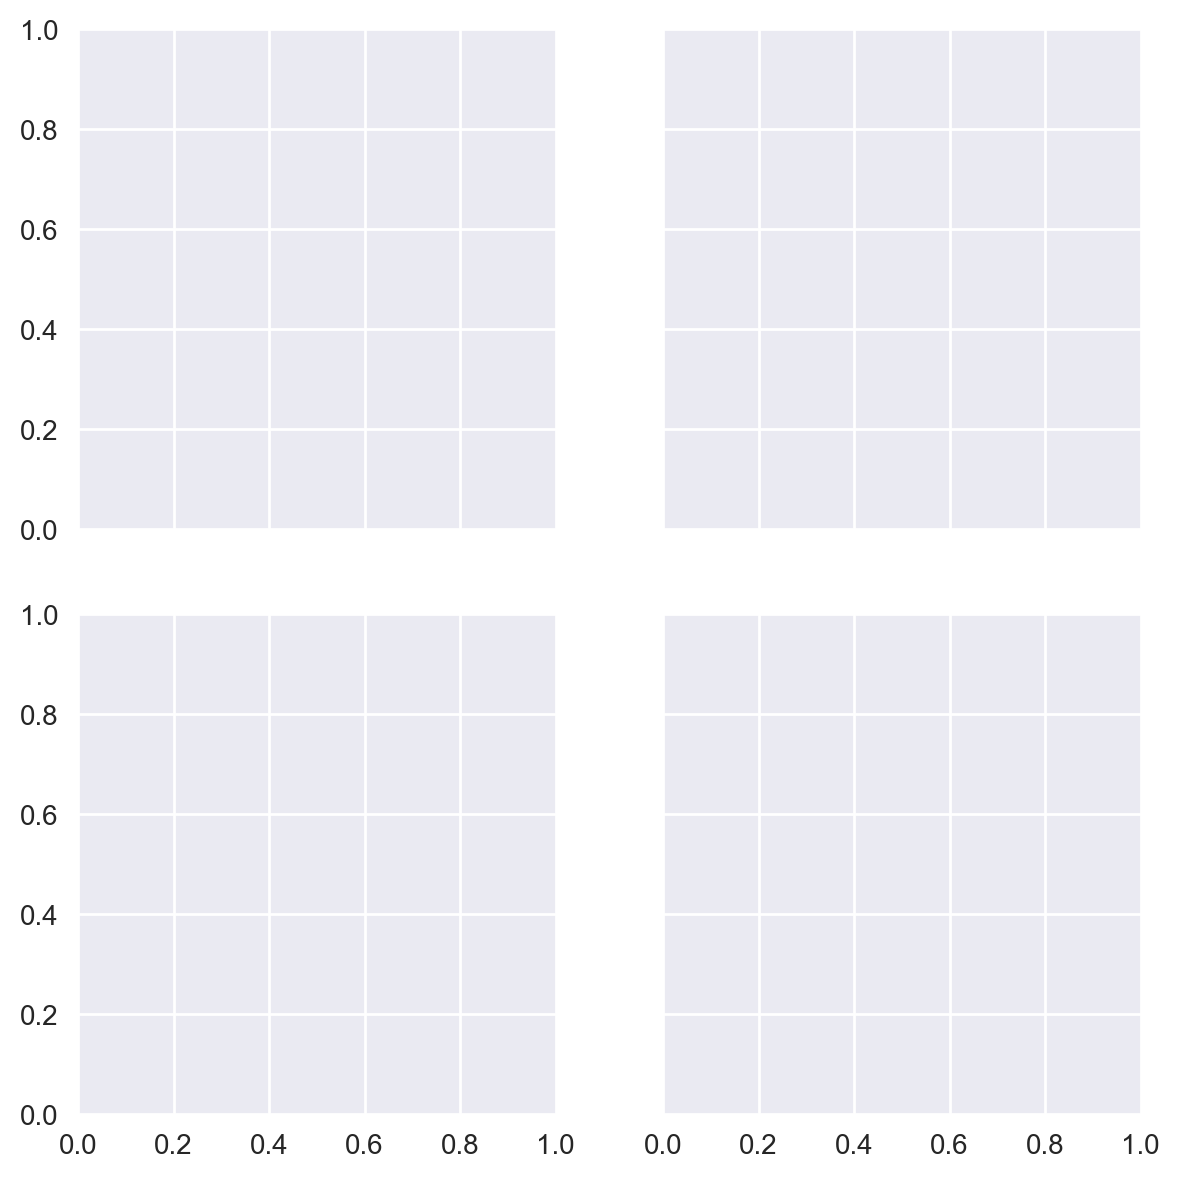

In [22]:
grid = sns.FacetGrid(df, col="gol_inst", col_wrap = 2)

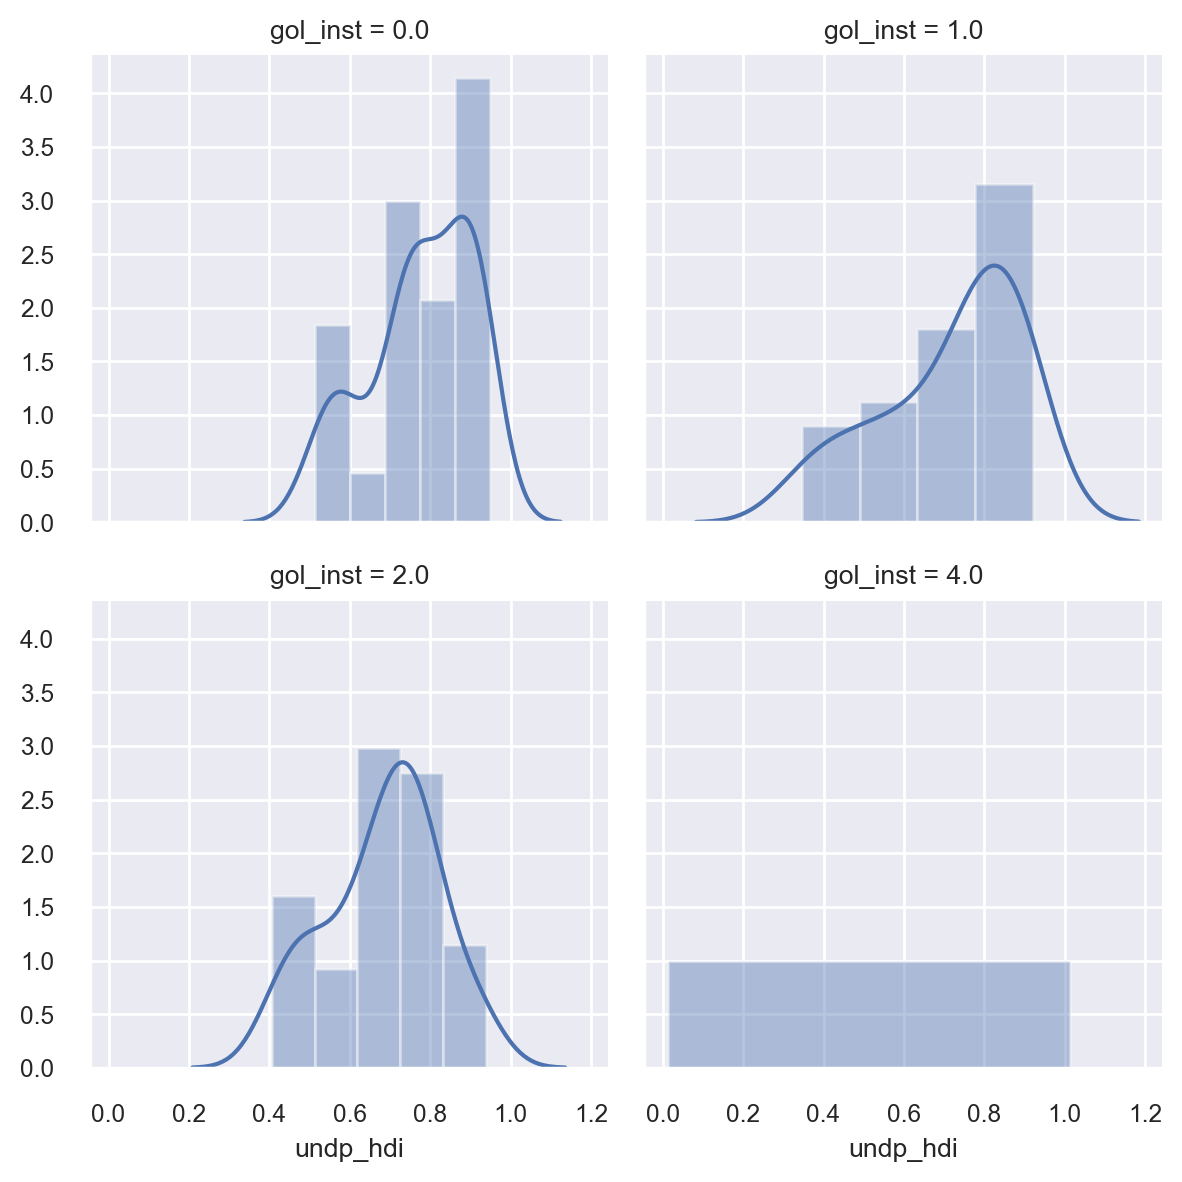

In [39]:
sns.set(font_scale=0.8) # Escalamiento de los titulos para que no sean tan grandes
grid = sns.FacetGrid(df, col="gol_inst", col_wrap=2)
axes = grid.axes.flatten() # Obtener los ejes de ploteo para poder darle titulo a cada grafico
axes[0].set_title('gol_inst = 0.0')
axes[1].set_title('gol_inst = 1.0')
axes[2].set_title('gol_inst = 2.0')
axes[3].set_title('gol_inst = 4.0')
grid = grid.map(sns.distplot, "undp_hdi")

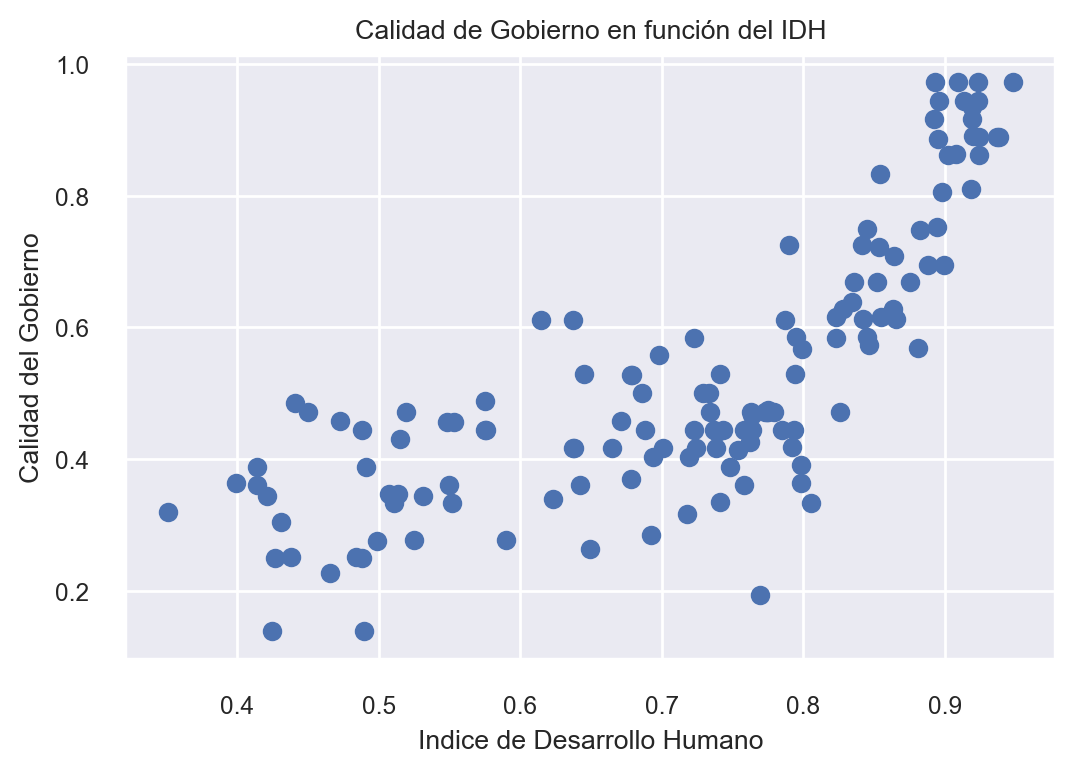

In [40]:
# generamos el gráfico
plt.scatter(x=df['undp_hdi'], y=df['icrg_qog'])
plt.title('Calidad de Gobierno en función del IDH')
plt.xlabel("Indice de Desarrollo Humano")
plt.ylabel("Calidad del Gobierno")

In [41]:
# Separemos las columnas a trabajar y eliminemos los datos perdidos.
scatter_data = df.loc[:, ['undp_hdi', 'icrg_qog', 'ccodealp']].dropna()
# calculamos los valores de la recta
pendiente, intercepto = np.polyfit(scatter_data['undp_hdi'],
scatter_data['icrg_qog'], 1)
# pidamos los valores
print("La pendiente es de: ", pendiente.round(3))
print("El intercepto es de: ", intercepto.round(3))


La pendiente es de:  1.008
El intercepto es de:  -0.195


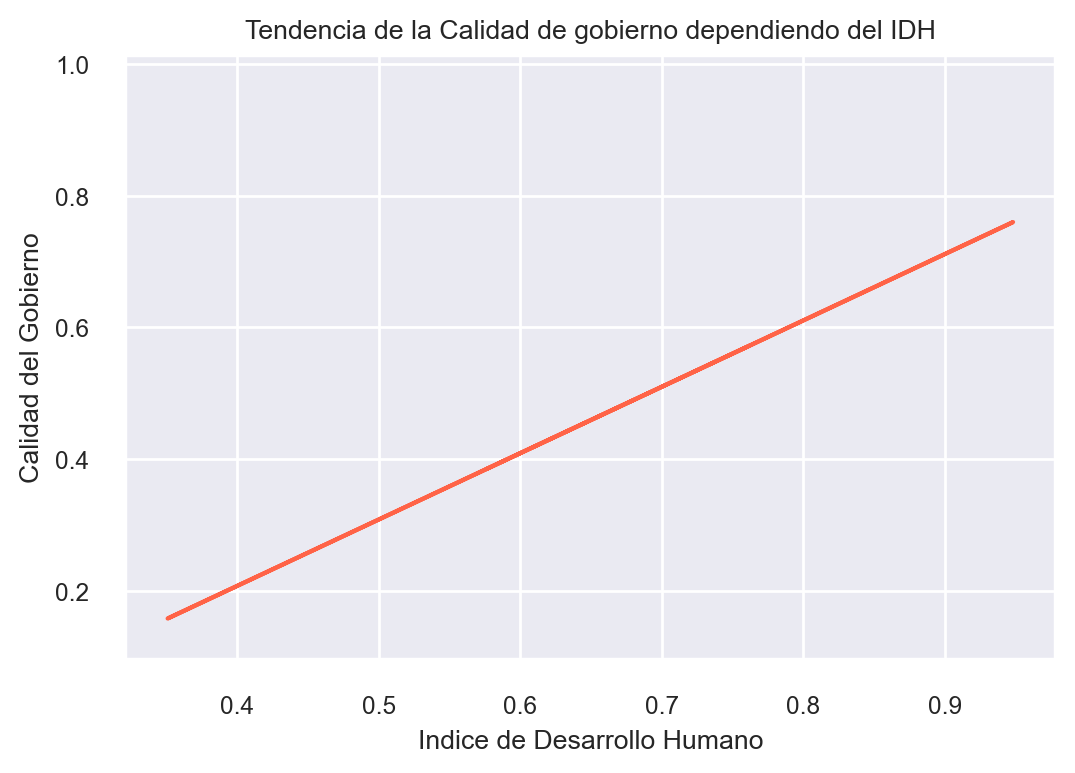

In [44]:
# para separar los elementos del gráfico, generamos dos objetos a partir de subplots
fig, ax = plt.subplots()
# generamos el gráfico, declaramos que los puntos sean lo más pequeños posible con marker="," y s=.1
ax.scatter(x=scatter_data['undp_hdi'], y=scatter_data['icrg_qog'],
marker=",", s=.1)
# graficamos la recta a lo largo de undp_hdi
ax.plot(scatter_data['undp_hdi'],
# generamos un list comprehension que calcule el valor de la recta a lo largo de undp_hdi
[pendiente * j + intercepto for j in scatter_data['undp_hdi']],
color='tomato')
ax.set_title('Tendencia de la Calidad de gobierno dependiendo del IDH')
ax.set_xlabel("Indice de Desarrollo Humano")
ax.set_ylabel("Calidad del Gobierno");

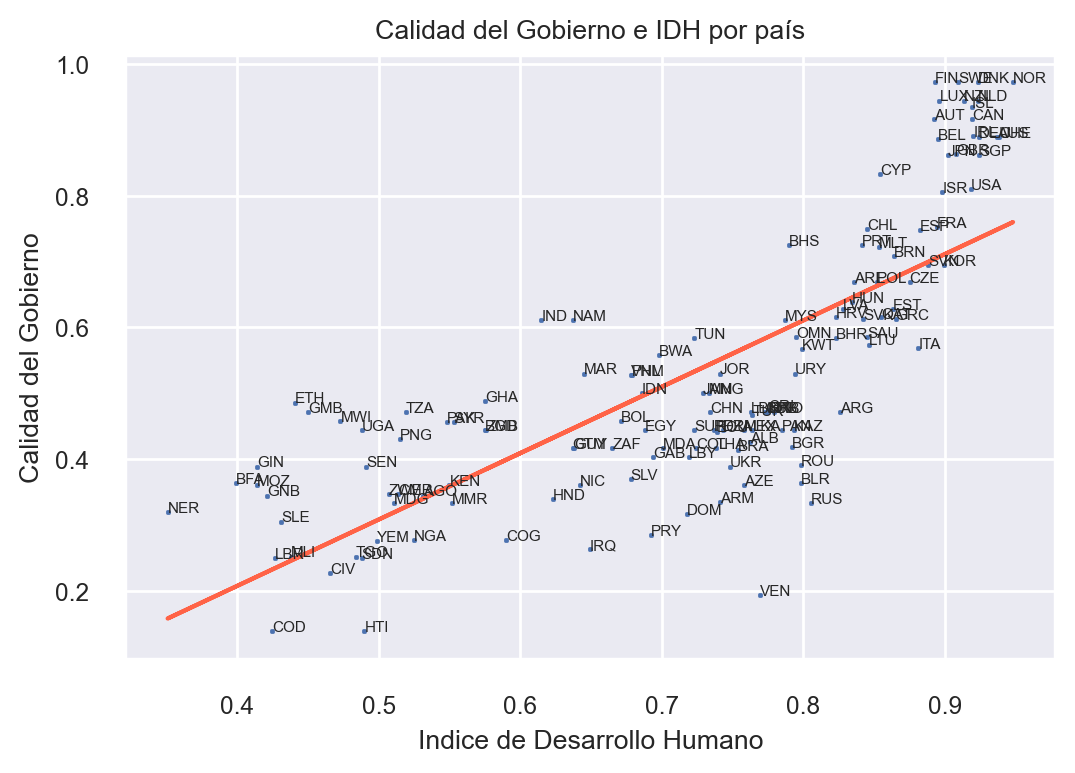

In [48]:
fig, ax = plt.subplots()
ax.scatter(x=scatter_data['undp_hdi'], y=scatter_data['icrg_qog'],
marker=",", s=1)
ax.plot(scatter_data['undp_hdi'],
[pendiente * j + intercepto for j in scatter_data['undp_hdi']],
color='tomato')
for i in scatter_data.index:
    ax.text(scatter_data.loc[i, 'undp_hdi'],
        scatter_data.loc[i, 'icrg_qog'],
        str(scatter_data.loc[i, 'ccodealp']),
        fontsize = 5.5)
ax.set_title('Calidad del Gobierno e IDH por país')
ax.set_xlabel("Indice de Desarrollo Humano")
ax.set_ylabel("Calidad del Gobierno");

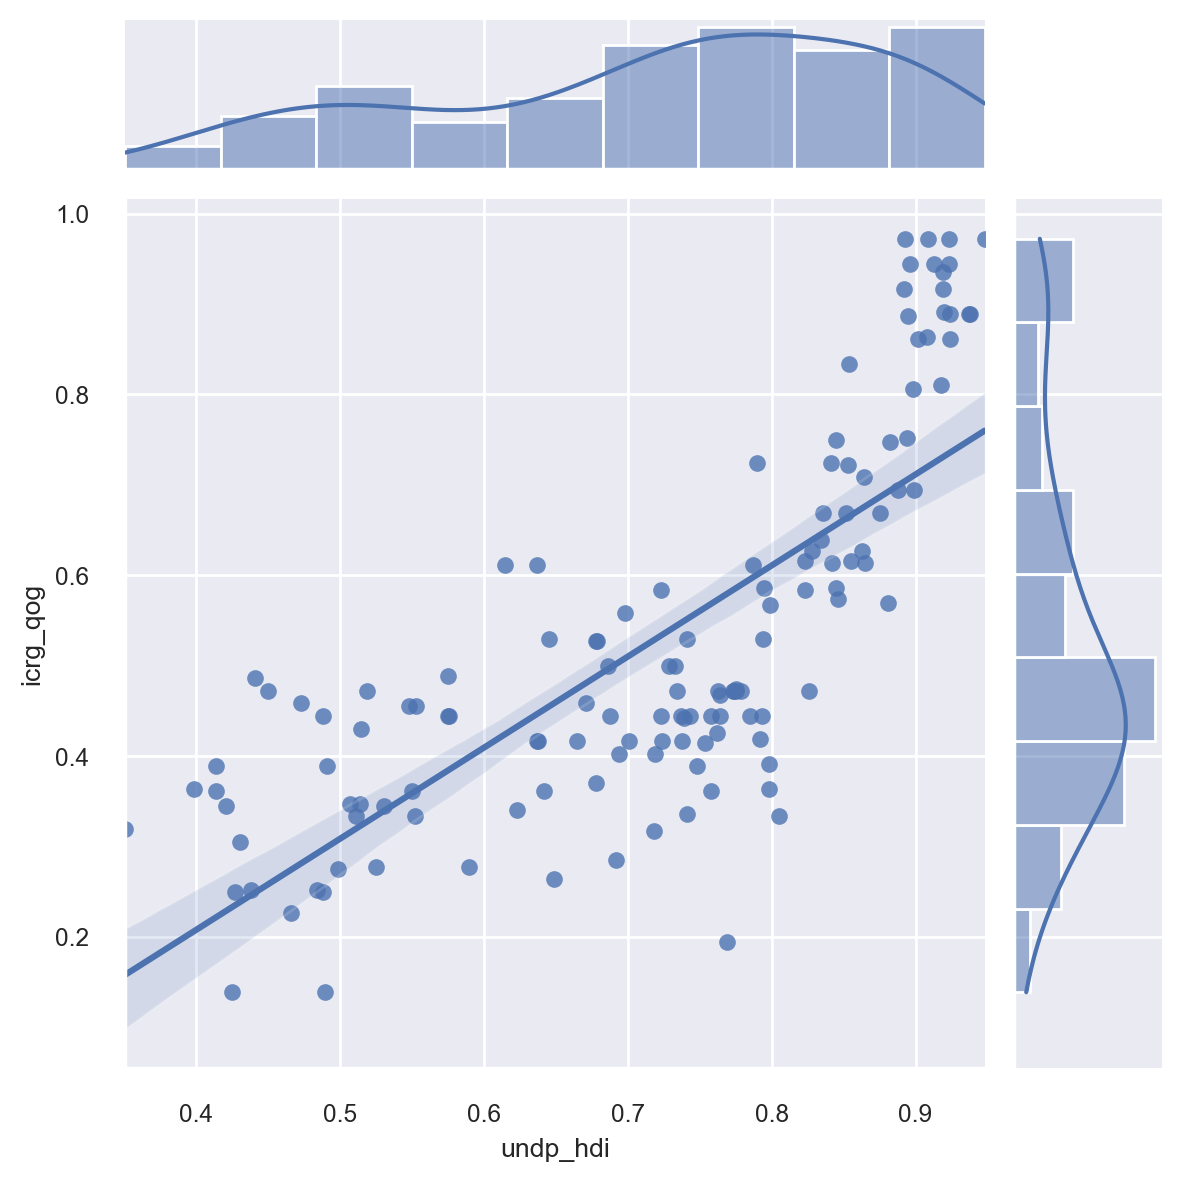

In [49]:
sns.jointplot(scatter_data['undp_hdi'], scatter_data['icrg_qog'],
kind='reg')

In [4]:
import math
(86-140)/(64/10)

-8.4375